In [24]:
# Libraries import
import pandas as pd, numpy as np, missingno as mno, datetime

In [32]:
# Read the dataset
df = pd.read_csv('course_Quiz_P2.csv')
df.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,340.000000,336.000000
mean,177.061765,56.991176,780553.123529,42.145833
std,166.584054,25.059279,514.526264,13.963690
min,-100.000000,14.000000,779543.000000,18.000000
25%,85.750000,27.000000,780200.500000,34.000000
50%,170.500000,76.000000,780536.500000,41.500000
75%,255.250000,76.000000,780906.500000,49.250000
max,2640.000000,78.000000,781831.000000,174.000000


In [31]:
# Check for missing values
missing = df.isnull().sum()
print(missing)

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
date_time         1
dtype: int64


In [33]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []


In [28]:
#calculate descriptive statistics for the dataset
descriptive_stats = df.describe()

#check for outliers in the numerical variables
for col in df.select_dtypes(include=['int64','float64']).columns:
    q1 = descriptive_stats.loc['25%', col]
    q3 = descriptive_stats.loc['75%', col]
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    
    if len(outlier_values) > 0:
        print("Column "+col+" has outliers")
        print("Outlier values are:")
        print(df.iloc[outlier_values])

Column Position has outliers
Outlier values are:
     Position Sexe     Temps  Dept  Temps_secondes   Age
264      2640    M  00:56:21    76          780981  51.0
Column Age has outliers
Outlier values are:
     Position Sexe     Temps  Dept  Temps_secondes    Age
260       261    F  00:56:08    27          780968   73.0
302       303    M  01:00:04    76          781204  174.0


<AxesSubplot: >

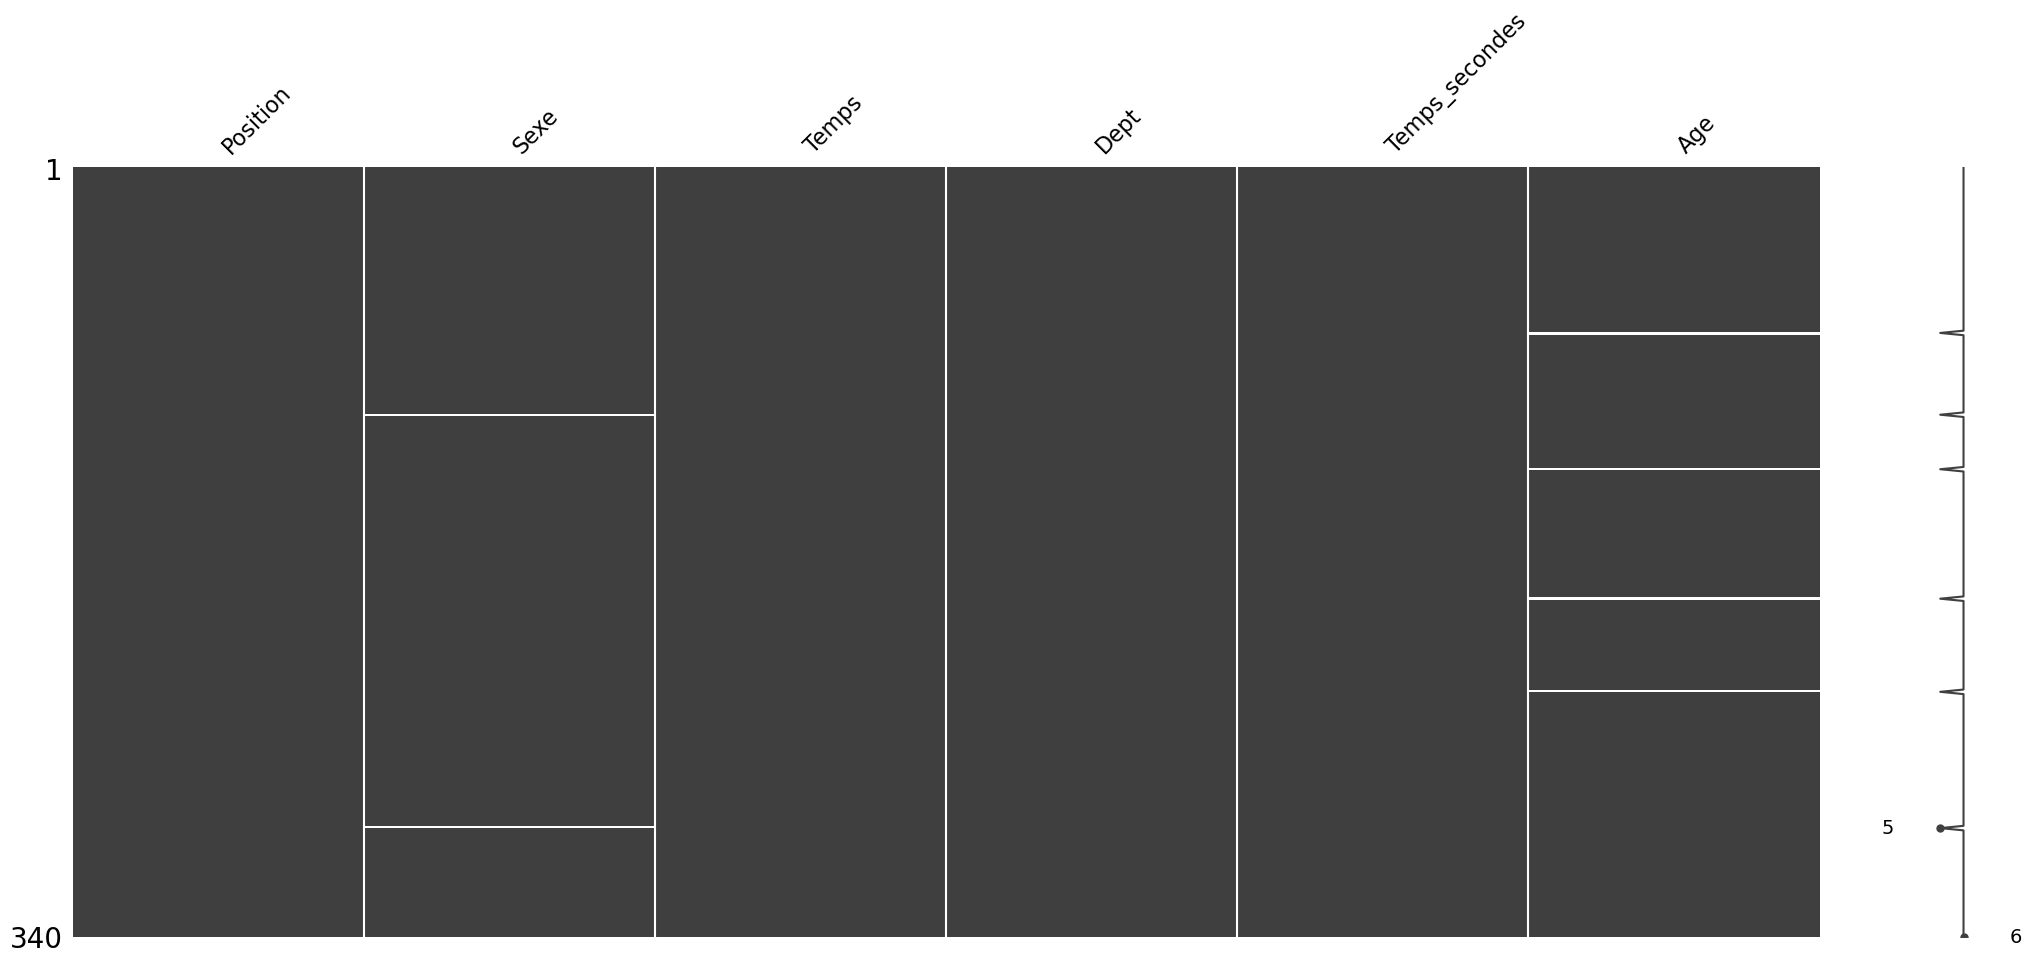

In [29]:
mno.matrix(df)

In [30]:
df['date_time'] = None

for i in range(len(df)):
    # convert time to datetime
    try:
        date_time = datetime.datetime.strptime(df.Temps[i], '%H:%M:%S')
    except ValueError:
        date_time = None
    # assign date_time to the new column
    df.date_time[i] = date_time


/tmp/ipykernel_324695/1526032350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date_time[i] = date_time


In [34]:
df.mod()

NameError: name 'mod' is not defined